# ISTAT Microdata Extractor example notebook
## Joint probability distribution extraction
This notebok provides a usage example of the ISTAT Microdata Extractor tool for navigating and processing the [ISTAT microdata](https://www.istat.it/microdati/aspetti-della-vita-quotidiana/) from the survey **"Aspetti della Vita Quotidiana" (AVQ)**. It includes a Python class `ISTATMicrodataExtractor` with structured methods to explore, query, and analyze the AVQ dataset efficiently.

In this example we will extract the joint probability distribution of two attributes of the dataset.

In [1]:
from microdata_extractor import ISTATMicrodataExtractor

In [2]:
# Initialize the class and load the data
avq = ISTATMicrodataExtractor()
avq.load_data("Replica/AVQ_2022_IT")

In [3]:
avq.df

PROFAM,PROIND,NCOMP,ANNO,RELPAR,ETAMi,SESSO,STCIVMi,STCPM,AMATR,ISTRMi,CONDMi,LAVPAS,POSIZMi,ATECOMi,TIPNU2,NUMNU2,RPNUC2,TIPFA2Mi,REGMf,RIPMf,COEFIN,REDPRMi,CITTMi,MOTAS,DADLEZOL,DADPC,DADTB,DADCELL,DADDIFF,DADDIF1,DADDIF2,DADDIF3,DADDIF3_BIS,DADDIF4,DADDIF5,DADDIF6,…,NCLIMAT,BIC,NBIC,MOTOR,NMOTOR,AMOTO,NMOTOM,AUTO,NAUTOM,BOX,NBOX,LIBFAM,TELCEL,NTELCELM,TELCIN,PC,VGIOC,NVIGIOC,EBOOK,NEBOOKM,FOTODIG,NFOTODIG,AINTERN,CIDSLWIFI,CISFPAL,CISFMOD,CIBASTR,MOTNOAI1,MOTNOAI3,MOTNOAI4,MOTNOAI5,MOTNOAI6,MOTNOAI8,MOTNOAI10,MOTNOAI9,SITE,RISEC
i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,…,str,i64,str,i64,str,i64,str,i64,str,str,str,i64,i64,str,str,i64,i64,str,i64,str,i64,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64
1,1,1,2022,1,15,2,"""6""",null,null,"""10""","""3""","""2""","""04""",null,0,0,0,1,80,2,19501930,"""3""",1,null,null,null,null,null,null,null,null,null,null,null,null,null,…,"""2""",3,null,5,null,7,null,1,null,null,null,4,1,null,null,1,1,null,3,null,5,null,1,null,null,null,null,null,null,null,null,"""5""",null,null,null,4,3
2,1,4,2022,1,11,1,"""2""","""1""","""1997""","""07""","""1""",null,"""02""","""02""",1,1,2,2,80,2,19200992,"""1""",1,null,null,null,null,null,null,null,null,null,null,null,null,null,…,"""3""",4,"""1""",5,null,8,"""1""",2,"""2""","""2""","""2""",2,2,"""4""","""2""",2,2,"""2""",3,null,6,"""1""",2,"""1""",null,null,null,null,null,null,null,null,null,null,null,5,3
2,2,4,2022,2,11,2,"""2""","""1""","""1997""","""07""","""1""",null,"""02""","""02""",1,1,1,2,80,2,19200992,"""1""",1,null,null,null,null,null,null,null,null,null,null,null,null,null,…,"""3""",4,"""1""",5,null,8,"""1""",2,"""2""","""2""","""2""",2,2,"""4""","""2""",2,2,"""2""",3,null,6,"""1""",2,"""1""",null,null,null,null,null,null,null,null,null,null,null,5,3
2,3,4,2022,6,8,2,"""1""",null,null,"""07""","""3""","""2""","""04""",null,1,1,3,2,80,2,19200992,"""6""",1,null,null,null,null,null,null,null,null,null,null,null,null,null,…,"""3""",4,"""1""",5,null,8,"""1""",2,"""2""","""2""","""2""",2,2,"""4""","""2""",2,2,"""2""",3,null,6,"""1""",2,"""1""",null,null,null,null,null,null,null,null,null,null,null,5,3
2,4,4,2022,6,5,1,"""1""",null,null,"""09""","""3""",null,null,null,1,1,3,2,80,2,19200992,"""6""",1,null,"""1""",null,null,null,null,null,null,null,null,null,null,null,…,"""3""",4,"""1""",5,null,8,"""1""",2,"""2""","""2""","""2""",2,2,"""4""","""2""",2,2,"""2""",3,null,6,"""1""",2,"""1""",null,null,null,null,null,null,null,null,null,null,null,5,3
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
18432,4,4,2022,6,8,2,"""1""",null,null,"""07""","""2""","""1""",null,null,1,1,3,2,10,1,9974438,"""6""",1,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,4,"""2""",5,null,7,null,1,null,null,null,5,2,"""4""","""2""",2,2,"""2""",4,"""1""",6,"""1""",2,"""1""","""2""",null,null,null,null,null,null,null,null,null,null,2,2
18433,1,4,2022,1,11,1,"""3""",null,null,"""07""","""1""",null,"""01""","""03""",1,1,2,2,10,1,10553667,"""2""",1,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,4,"""2""",5,null,7,null,2,"""3""","""1""",null,3,2,"""4""","""2""",2,1,null,3,null,5,null,2,"""1""",null,null,null,null,null,null,null,null,null,null,null,4,2
18433,2,4,2022,3,12,2,"""3""",null,null,"""09""","""2""","""2""","""03""",null,1,1,1,2,10,1,10553667,"""6""",1,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,4,"""2""",5,null,7,null,2,"""3""","""1""",null,3,2,"""4""","""2""",2,1,null,3,null,5,null,2,"""1""",null,null,null,null,null,null,null,null,null,null,null,4,2


## Attributes categorization

The dataset is collected from a survey submitted to more than 18000 italian families and features **741 attributes** about over 42000 individuals (2022 survey).

The folder data in the [Github repository](https://github.com/Clearbox-AI/ISTAT-microdata-extractor) provides the data downloaded from the relative [ISTAT page](https://www.istat.it/microdati/aspetti-della-vita-quotidiana/) where it was added a file "AVQ_attributes_categories.csv" where each attribute is labeled with up to three categories to make the consultation of the dataset easier.

These attributes' categories are merged to the original "AVQ_Tracciato_2022.html" file into "AVQ_Tracciato_2022_with_categories.csv".

This file makes it possible to consult the attributes by categories.

The categories available can be viewed with:

In [4]:
avq.attribute_categories

['culture',
 'health_behaviour',
 'health_conditions',
 'digital',
 'employment',
 'income',
 None,
 'healthcare',
 'transportation',
 'traveling',
 'sport',
 'finance',
 'demographics',
 'goods',
 'education',
 'identifiers',
 'social_relations',
 'opinion',
 'entertainment',
 'social_commitment',
 'trust',
 'energy',
 'purchase_habits',
 'food_drink',
 'house',
 'other']

Once we have identified the categories we are interested in from the list above, it is possible to filter out the attributes based on the categories and consult their description to find the attributes we need.

In [5]:
# It is possible to pass up to three categories to the method get_attributes_by_categories().
_ = avq.get_attributes_by_categories("sport", "health_conditions", how="or", print_output=True)

32 attributes matching the search criteria
Results for categories sport or health_conditions:

n°   Attribute	Description
-----------------------------------------------------
122  SPOCON:	Nel suo tempo libero pratica con carattere di continuit� uno o pi� sport?
123  SPOSAL:	Nel suo tempo libero pratica saltuariamente uno o pi� sport?
124  ATTFIS:	Le capita di svolgere nel tempo libero qualche attivit� fisica?
125  FREQSPO:	Frequenza nell'anno delle attivit� sportive praticate
126  ORESETSP:	Ore di attivit� sportiva praticate nell'ultima settimana
127  SPPAG:	Negli ultimi 12 mesi ha fatto sport in luoghi a pagamento?
128  SPRIV:	Negli ultimi 12 mesi ha frequentato lezioni private o corsi di sport a spese sue o della famiglia?
129  RETTA:	Paga una retta annua o periodica per un circolo o club sportivo?
193  SALUTE:	Come va in generale la sua salute?
195  DIAB:	Affetto da malattia cronica: diabete
196  IPAR:	Affetto da malattia cronica: ipertensione arteriosa
197  INFAR:	Affetto da malat

Let's say we are interested in the correlation between the weekly frequency of sports activity (attribute "FREQSPO") and the Body Mass Index (attrbiute "BMI") of adult individuals (age>=18, attribute "ETAMi").

First we need to check out the categorical atributes' encoding.

In [6]:
_ = avq.get_attribute_encoding("FREQSPO", print_output=True)
print("\n")
_ = avq.get_attribute_encoding("BMI", print_output=True)
print("\n")
_ = avq.get_attribute_encoding("ETAMi", print_output=True)

FREQSPO
Encod.	Description
1	cinque o pi� volte a settimana
2	tre o quattro volte a settimana
3	due volte a settimana
4	una volta a settimana
5	due o tre volte al mese
6	una volta al mese
7	qualche volta durante l'anno


BMI
Encod.	Description
1	Sottopeso
2	Normopeso
3	Sovrappeso
4	Obeso


ETAMi
Encod.	Description
1	da 0 a 2 anni
2	da 3 a 5 anni
3	da 6 a 10 anni
4	da 11 a 13 anni
5	da 14 a 15 anni
6	da 16 a 17 anni
7	da 18 a 19 anni
8	da 20 a 24 anni
9	da 25 a 34 anni
10	da 35 a 44 anni
11	da 45 a 54 anni
12	da 55 a 59 anni
13	da 60 a 64 anni
14	da 65 a 74 anni
15	75 anni e piu'


Now we can extract the joint distribution from the dataset.

It is possible to extract the joint probability distribution of more than variables.

In [ ]:
# joint is the dataframe with the joint distribution and meta is the attributes' encoding.
# It is possible to add more than one filtering condition in the triplet form shown below 
#   (e.g. conditions=[("ATTR1","==",1), ("ATTR2",">",2), ...]).

joint, meta = avq.joint_distribution(
            attrs=["FREQSPO", "BMI"],
            conditions=[("ETAMi", ">=", 7)], # Adults (age>=18)
            normalise=True,
        )

print(joint)
print(meta)

shape: (32, 4)
┌─────────┬─────┬───────┬──────────┐
│ FREQSPO ┆ BMI ┆ count ┆ prob     │
│ ---     ┆ --- ┆ ---   ┆ ---      │
│ str     ┆ str ┆ u32   ┆ f64      │
╞═════════╪═════╪═══════╪══════════╡
│ null    ┆ 2   ┆ 11124 ┆ 0.309723 │
│ null    ┆ 3   ┆ 9400  ┆ 0.261722 │
│ null    ┆ 4   ┆ 3489  ┆ 0.097143 │
│ 3       ┆ 2   ┆ 2298  ┆ 0.063983 │
│ 2       ┆ 2   ┆ 1889  ┆ 0.052595 │
│ …       ┆ …   ┆ …     ┆ …        │
│ 1       ┆ 1   ┆ 33    ┆ 0.000919 │
│ 5       ┆ 1   ┆ 28    ┆ 0.00078  │
│ 6       ┆ 4   ┆ 26    ┆ 0.000724 │
│ 7       ┆ 1   ┆ 10    ┆ 0.000278 │
│ 6       ┆ 1   ┆ 7     ┆ 0.000195 │
└─────────┴─────┴───────┴──────────┘
{'FREQSPO': {1: 'cinque o pi� volte a settimana', 2: 'tre o quattro volte a settimana', 3: 'due volte a settimana', 4: 'una volta a settimana', 5: 'due o tre volte al mese', 6: 'una volta al mese', 7: "qualche volta durante l'anno"}, 'BMI': {1: 'Sottopeso', 2: 'Normopeso', 3: 'Sovrappeso', 4: 'Obeso'}}


In [ ]:
import polars as pl

joint_prob_heatmap = (
    joint.drop_nulls() # Drop rows with one or more null values
    .pivot(
        values="prob",
        index="FREQSPO", # Rows
        on="BMI",        # Columns
        aggregate_function="first"  # assuming each pair is unique
    )
    .with_columns(pl.col("FREQSPO").cast(pl.Int32))
    .sort("FREQSPO", descending=True)  # child_age descending (top to bottom)
)
# Sort columns by BMI ascending (left to right)
BMI_cols = sorted(
    [int(col) for col in joint_prob_heatmap.columns if col != "FREQSPO"]
)
BMI_cols_cols_str = [str(col) for col in BMI_cols]

joint_prob_heatmap = joint_prob_heatmap.select(["FREQSPO"] + BMI_cols_cols_str)
joint_prob_heatmap

FREQSPO,1,2,3,4
i32,f64,f64,f64,f64
7,0.000278,0.006265,0.004399,0.001364
6,0.000195,0.004204,0.002394,0.000724
5,0.00078,0.013448,0.007518,0.002227
4,0.00206,0.029847,0.016928,0.003982
3,0.003842,0.063983,0.030182,0.006599
2,0.003035,0.052595,0.022386,0.003564
1,0.000919,0.018766,0.00735,0.001504


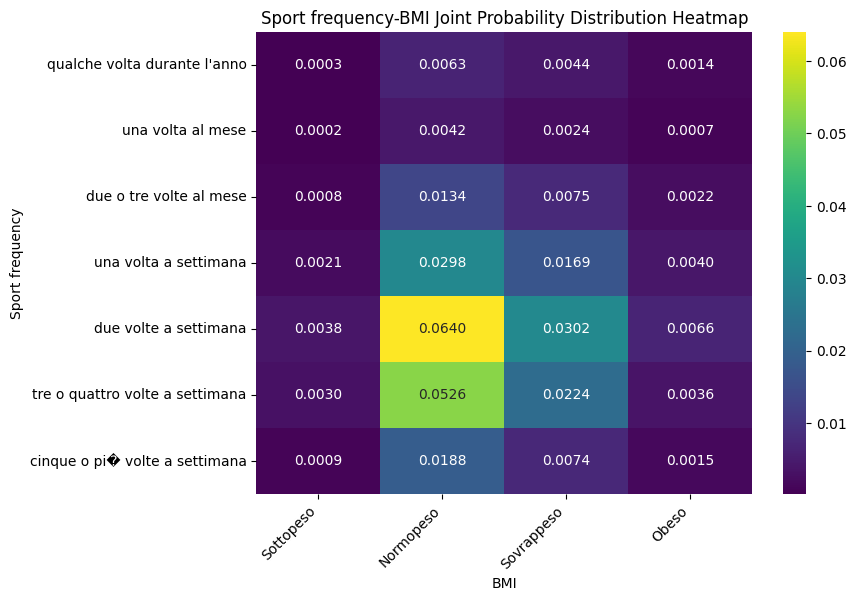

In [9]:
# Plot the results
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    joint_prob_heatmap[:,1:],
    cmap="viridis",
    annot=True,
    fmt=".4f"
)

sport_labels = avq.get_attribute_encoding("FREQSPO", print_output=False)
BMI_labels = avq.get_attribute_encoding("BMI", print_output=False)

xticks = joint_prob_heatmap.columns[1:]
yticks = joint_prob_heatmap.select(pl.col("FREQSPO")).to_series().unique().sort(descending=True)
ax.set_xticks([el+0.5 for el in range(len(xticks))])
ax.set_xticklabels([BMI_labels.get(int(val)) for val in xticks], rotation=45, ha='right')

ax.set_yticks([el+0.5 for el in range(len(yticks))])
ax.set_yticklabels([sport_labels.get(val) for val in yticks], rotation=0, ha='right')

plt.title("Sport frequency-BMI Joint Probability Distribution Heatmap")
plt.xlabel("BMI")
plt.ylabel("Sport frequency")
plt.show()